# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.88'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym50,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model
0,187-1-124-reg1-A--Spectrum--013--Spec.Data 1,104.137476,0.018180,1283.771649,0.017080,204.259176,1283.771649,630.007096,1.179249,2.458578,...,1.083458,1.051118,0.196834,0.011547,1.023483,1.039244,0.040692,0.004015,PseudoVoigtModel,PseudoVoigtModel
1,187-1-124-reg1-B--Spectrum--015--Spec.Data 1,104.334436,0.003794,1283.390956,0.003340,640.518511,1283.391006,1844.190957,1.062579,2.174737,...,1.050325,1.025316,0.106948,0.003318,1.016913,1.019490,0.026670,0.001156,PseudoVoigtModel,PseudoVoigtModel
2,187-1-124-reg1-C--Spectrum--019--Spec.Data 1,104.301896,0.012235,1283.450215,0.011193,219.027160,1283.450215,631.653012,1.022299,2.682760,...,1.086957,1.002304,0.177791,0.009335,1.004175,1.026826,0.006625,0.003343,PseudoVoigtModel,PseudoVoigtModel
3,187-1-124-reg1-D--Spectrum--021--Spec.Data 1,104.333466,0.005214,1283.389335,0.004905,649.786728,1283.389385,1900.996184,1.077959,3.068885,...,1.056543,1.020157,0.121902,0.003318,1.010373,1.029499,0.016766,0.001164,PseudoVoigtModel,PseudoVoigtModel
4,187-1-124-reg1-E--Spectrum--025--Spec.Data 1,104.081664,0.018999,1283.636313,0.018178,257.121560,1283.636313,671.365213,0.935128,4.973584,...,2.697842,2.796791,3.175398,0.007274,1.069264,1.017417,0.110588,0.003743,PseudoVoigtModel,PseudoVoigtModel


## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'FG', 'Cap','window','Video'],
 sort=True)
diad_meta[0]

'14 187-1-124-reg1-A--Spectrum--013--Information.txt'

## Now get all the important information out of the metadata files

In [5]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 14/14 [00:00<00:00, 1077.32it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-1-124-reg1-A--Spectrum--013--Information.txt,"February 22, 2024\n",February,22.0,6.002,60.0,5.0,50.0,"['0h', '5m', '1s']",1:44:16 PM\n,49456.0,1325.004
1,187-1-124-reg1-B--Spectrum--015--Information.txt,"February 22, 2024\n",February,22.0,5.978,60.0,5.0,50.0,"['0h', '5m', '1s']",1:52:50 PM\n,49970.0,1325.004
2,187-1-124-reg1-C--Spectrum--019--Information.txt,"February 22, 2024\n",February,22.0,5.970,60.0,5.0,50.0,"['0h', '5m', '2s']",2:00:28 PM\n,50428.0,1325.004
3,187-1-124-reg1-D--Spectrum--021--Information.txt,"February 22, 2024\n",February,22.0,5.962,60.0,5.0,50.0,"['0h', '5m', '1s']",2:06:06 PM\n,50766.0,1325.004
4,187-1-124-reg1-E--Spectrum--025--Information.txt,"February 22, 2024\n",February,22.0,5.936,60.0,5.0,50.0,"['0h', '5m', '2s']",2:26:45 PM\n,52005.0,1325.004


## Then get a simple file name you can stitch with the spectra

In [6]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'187-1-124-reg1-A--Spectrum--013--Information'

In [7]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['187-1-124-reg1-A--Spectrum--013',
       '187-1-124-reg1-B--Spectrum--015',
       '187-1-124-reg1-C--Spectrum--019',
       '187-1-124-reg1-D--Spectrum--021',
       '187-1-124-reg1-E--Spectrum--025',
       '187-1-124-reg1-E--Spectrum--026',
       '187-1-124-reg1-F--Spectrum--028',
       '187-1-124-reg1-G--Spectrum--030',
       '187-1-124-reg1-H--Spectrum--032',
       '187-1-124-reg1-H--Spectrum--033',
       '187-1-124-reg2-A--Spectrum--036',
       '187-1-124-reg2-B--Spectrum--038',
       '187-1-124-reg2-C--Spectrum--040', 'FO-1--Spectrum--045'],
      dtype=object)

## Now get filename from spectra into same form as metadata

In [8]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
187-1-124-reg1-A--Spectrum--013--Spec.Data 1


In [9]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['187-1-124-reg1-A--Spectrum--013',
       '187-1-124-reg1-B--Spectrum--015',
       '187-1-124-reg1-C--Spectrum--019',
       '187-1-124-reg1-D--Spectrum--021',
       '187-1-124-reg1-E--Spectrum--025',
       '187-1-124-reg1-E--Spectrum--026',
       '187-1-124-reg1-F--Spectrum--028',
       '187-1-124-reg1-G--Spectrum--030',
       '187-1-124-reg1-H--Spectrum--032',
       '187-1-124-reg1-H--Spectrum--033',
       '187-1-124-reg2-A--Spectrum--036',
       '187-1-124-reg2-B--Spectrum--038',
       '187-1-124-reg2-C--Spectrum--040', 'FO-1--Spectrum--045'],
      dtype='<U44')

In [10]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-1-124-reg1-A--Spectrum--013,104.137476,0.018180,1283.771649,0.017080,204.259176,1283.771649,630.007096,1.179249,2.458578,...,February,22.0,6.002,60.0,5.0,50.0,"['0h', '5m', '1s']",1:44:16 PM\n,49456.0,1325.004
1,187-1-124-reg1-B--Spectrum--015,104.334436,0.003794,1283.390956,0.003340,640.518511,1283.391006,1844.190957,1.062579,2.174737,...,February,22.0,5.978,60.0,5.0,50.0,"['0h', '5m', '1s']",1:52:50 PM\n,49970.0,1325.004
2,187-1-124-reg1-C--Spectrum--019,104.301896,0.012235,1283.450215,0.011193,219.027160,1283.450215,631.653012,1.022299,2.682760,...,February,22.0,5.970,60.0,5.0,50.0,"['0h', '5m', '2s']",2:00:28 PM\n,50428.0,1325.004
3,187-1-124-reg1-D--Spectrum--021,104.333466,0.005214,1283.389335,0.004905,649.786728,1283.389385,1900.996184,1.077959,3.068885,...,February,22.0,5.962,60.0,5.0,50.0,"['0h', '5m', '1s']",2:06:06 PM\n,50766.0,1325.004
4,187-1-124-reg1-E--Spectrum--025,104.081664,0.018999,1283.636313,0.018178,257.121560,1283.636313,671.365213,0.935128,4.973584,...,February,22.0,5.936,60.0,5.0,50.0,"['0h', '5m', '2s']",2:26:45 PM\n,52005.0,1325.004


## If you have secondary phases, now is the time to merge those in

In [11]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [12]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    SO2_ratio=pf.calculate_CO2_SO2_ratio(peak_area_SO2=df_combo_sec_phase['Peak_Area_SO2'], 
peak_area_diad1=df_combo_sec_phase['Diad1_Voigt_Area'], peak_area_diad2=df_combo_sec_phase['Diad2_Voigt_Area'],
wavelength=532.067, T_K=37+273.15, efficiency_SO2=1, efficiency_CO2=0.5, 
sigma_SO2=4.03, sigma_CO2_v1=0.8, sigma_CO2_v2=1.23)
    df_combo_sec_phase['SO2_mol_ratio']=SO2_ratio['SO2']

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [13]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

2.3941242895810155e-05


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-1-124-reg1-A--Spectrum--013,0.486541,0.008761,0.008439,0.002354,103.905945,0.018319,0.002555,0.018180,6.002,...,49456.0,1095.390812,1053.487533,76.120664,Spline,0.645191,49456.0,0.997777,0.997752,0.997801
1,187-1-124-reg1-B--Spectrum--015,0.578699,0.003229,0.002196,0.002367,104.101605,0.004559,0.002540,0.003794,5.978,...,49970.0,NaN,NaN,NaN,NaN,NaN,49970.0,0.997768,0.997744,0.997793
2,187-1-124-reg1-C--Spectrum--019,0.562762,0.006411,0.005959,0.002364,104.068396,0.012466,0.002522,0.012235,5.970,...,50428.0,NaN,NaN,NaN,NaN,NaN,50428.0,0.997761,0.997737,0.997785
3,187-1-124-reg1-D--Spectrum--021,0.577619,0.003652,0.002782,0.002366,104.099363,0.005777,0.002512,0.005214,5.962,...,50766.0,NaN,NaN,NaN,NaN,NaN,50766.0,0.997756,0.997732,0.997780
4,187-1-124-reg1-E--Spectrum--025,0.459240,0.009007,0.008694,0.002351,103.846298,0.019117,0.002474,0.018999,5.936,...,52005.0,NaN,NaN,NaN,NaN,NaN,52005.0,0.997739,0.997715,0.997762


In [14]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

2.3941242895810155e-05


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-1-124-reg1-A--Spectrum--013,0.486541,0.008761,0.008439,0.002354,103.905945,0.018319,0.002555,0.018180,6.002,...,49456.0,1095.390812,1053.487533,76.120664,Spline,0.645191,49456.0,0.997777,0.997752,0.997801
1,187-1-124-reg1-B--Spectrum--015,0.578699,0.003229,0.002196,0.002367,104.101605,0.004559,0.002540,0.003794,5.978,...,49970.0,NaN,NaN,NaN,NaN,NaN,49970.0,0.997768,0.997744,0.997793
2,187-1-124-reg1-C--Spectrum--019,0.562762,0.006411,0.005959,0.002364,104.068396,0.012466,0.002522,0.012235,5.970,...,50428.0,NaN,NaN,NaN,NaN,NaN,50428.0,0.997761,0.997737,0.997785
3,187-1-124-reg1-D--Spectrum--021,0.577619,0.003652,0.002782,0.002366,104.099363,0.005777,0.002512,0.005214,5.962,...,50766.0,NaN,NaN,NaN,NaN,NaN,50766.0,0.997756,0.997732,0.997780
4,187-1-124-reg1-E--Spectrum--025,0.459240,0.009007,0.008694,0.002351,103.846298,0.019117,0.002474,0.018999,5.936,...,52005.0,NaN,NaN,NaN,NaN,NaN,52005.0,0.997739,0.997715,0.997762


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [15]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_February 22, 2024_fitted_2024-04-29.xlsx


## This helps visualize the errors on each spectra 

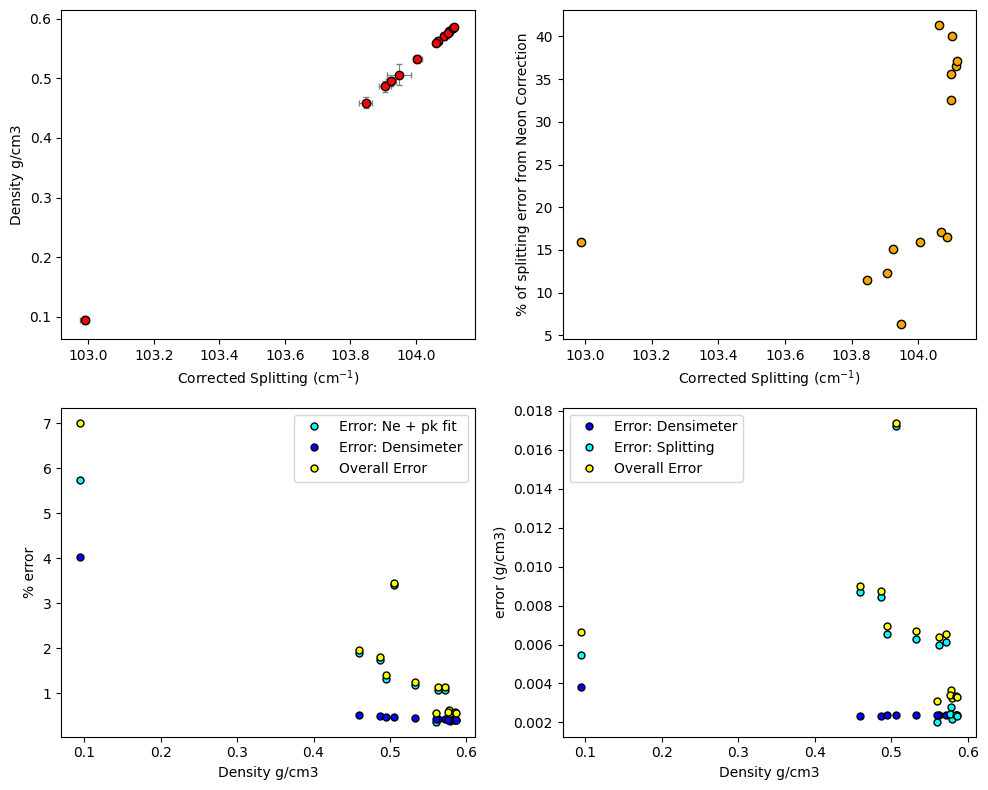

In [16]:
df=sorted_df
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=df.loc[df['Density g/cm3']>0]
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

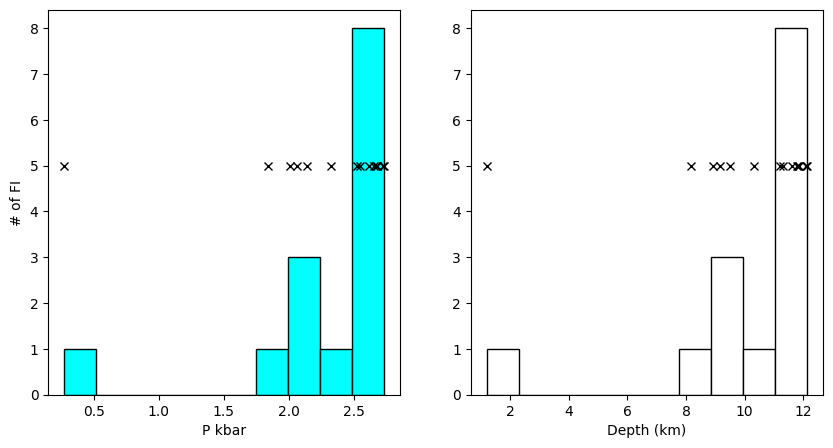

In [17]:
# Calculate pressure with a temperature estimate
Temp_C=1150
Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')